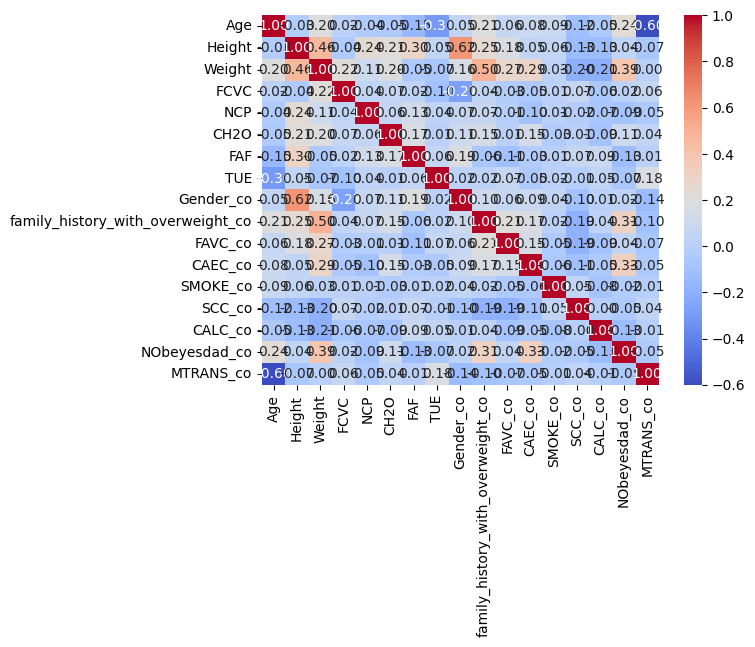

Age    Height    Weight      FCVC  \
Age                                1.000000 -0.025775  0.203451  0.017020   
Height                            -0.025775  1.000000  0.462264 -0.038580   
Weight                             0.203451  0.462264  1.000000  0.216268   
FCVC                               0.017020 -0.038580  0.216268  1.000000   
NCP                               -0.043951  0.243387  0.107413  0.042045   
CH2O                              -0.045583  0.213469  0.200543  0.068401   
FAF                               -0.145081  0.295354 -0.051355  0.019936   
TUE                               -0.296609  0.051583 -0.071571 -0.101221   
Gender_co                          0.048682  0.618145  0.161665 -0.274425   
family_history_with_overweight_co  0.205494  0.247245  0.496819  0.040395   
FAVC_co                            0.063392  0.177721  0.272303 -0.027227   
CAEC_co                            0.084146  0.048763  0.287492 -0.054612   
SMOKE_co                           0.091354  0.055725  0.025747  0.014376   
SCC_co                            -0.116028 -0.133369 -0.201906  0.071835   
CALC_co                           -0.045578 -0.129569 -0.206676 -0.060802   
NObeyesdad_co                      0.235660  0.039671  0.387641  0.018597   
MTRANS_co                         -0.600567 -0.073756  0.004610  0.064703   

                                        NCP      CH2O       FAF       TUE  \
Age                               -0.043951 -0.045583 -0.145081 -0.296609   
Height                             0.243387  0.213469  0.295354  0.051583   
Weight                             0.107413  0.200543 -0.051355 -0.071571   
FCVC                               0.042045  0.068401  0.019936 -0.101221   
NCP                                1.000000  0.056936  0.129519  0.036404   
CH2O                               0.056936  1.000000  0.167181  0.011924   
FAF                                0.129519  0.167181  1.000000  0.058586   
TUE                                0.036404  0.011924  0.058586  1.000000   
Gender_co                          0.067556  0.107889  0.189590  0.017290   
family_history_with_overweight_co  0.071273  0.147376 -0.056647  0.022941   
FAVC_co                           -0.006969  0.009733 -0.107936  0.068410   
CAEC_co                           -0.097788  0.145025 -0.030070 -0.048565   
SMOKE_co                           0.007806 -0.032003  0.011215  0.017610   
SCC_co                            -0.015615  0.008040  0.074273 -0.010927   
CALC_co                           -0.071787 -0.091384  0.086783  0.045866   
NObeyesdad_co                     -0.092637  0.108839 -0.129504 -0.069446   
MTRANS_co                         -0.053868  0.043968  0.006351  0.176949   

                                   Gender_co  \
Age                                 0.048682   
Height                              0.618145   
Weight                              0.161665   
FCVC                               -0.274425   
NCP                                 0.067556   
CH2O                                0.107889   
FAF                                 0.189590   
TUE                                 0.017290   
Gender_co                           1.000000   
family_history_with_overweight_co   0.102512   
FAVC_co                             0.064934   
CAEC_co                             0.091543   
SMOKE_co                            0.044698   
SCC_co                             -0.102633   
CALC_co                             0.007616   
NObeyesdad_co                       0.024908   
MTRANS_co                          -0.137537   

                                   family_history_with_overweight_co  \
Age                                                         0.205494   
Height                                                      0.247245   
Weight                                                      0.496819   
FCVC                                                        0.040395   
NCP                                      

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score



df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv") 



#categorizamos columnas object
labelencoder=LabelEncoder()
df["Gender_co"]=labelencoder.fit_transform(df["Gender"])
df["family_history_with_overweight_co"]= labelencoder.fit_transform(df["family_history_with_overweight"])
df["FAVC_co"]= labelencoder.fit_transform(df["FAVC"])
df["CAEC_co"]= labelencoder.fit_transform(df["CAEC"])
df["SMOKE_co"] = labelencoder.fit_transform(df["SMOKE"])
df["SCC_co"]= labelencoder.fit_transform(df["SCC"])
df["CALC_co"]= labelencoder.fit_transform(df["CALC"])
df["NObeyesdad_co"]= labelencoder.fit_transform(df["NObeyesdad"])
df["MTRANS_co"] = labelencoder.fit_transform(df["MTRANS"])


#Correlaciones
correlaciones =df.drop(columns=["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "NObeyesdad","MTRANS"]).corr()

# Creamos un mapa de calor (heatmap)
sns.heatmap(
    correlaciones,        
    annot=True,      
    cmap='coolwarm',  
    fmt=".2f"         
)
plt.show()

correlaciones


In [17]:
#REGRESION  MULTIPLE
# Selección de variables predictoras (X) y objetivo (y)

import numpy as np



columnas_predictoras = ["Gender_co", "Age","Height","Weight","family_history_with_overweight_co","FAVC_co","FCVC","NCP","CAEC_co","SMOKE_co","CH2O","SCC_co","FAF","TUE","CALC_co","MTRANS_co","NObeyesdad_co"]

#calculamos columna IMC
df["IMC"] = df["Weight"]/df["Height"]**2
X = df[columnas_predictoras]
y = df["IMC"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agregar la variable objetivo nuevamente al DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["IMC"] = y

# Calcular la correlación de las variables con la y
correlaciones = df_scaled.corr()["IMC"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)



# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

"""
· VIF < 5 → No hay problema de colinealidad.
· VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
· VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.

"""

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print("Intercepto:", modelo.intercept_)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")



# Función para hacer predicciones con nuevos valores de BMI
def predecir_progresion(Gender_co, Age, Height, Weight, family_history_with_overweight_co, FAVC_co, FCVC, NCP, CAEC_co, SMOKE_co, CH2O, SCC_co, FAF, TUE, CALC_co, MTRANS_co, NObeyesdad_co):
    prediccion = modelo.predict([[Gender_co, Age, Height, Weight, family_history_with_overweight_co, FAVC_co, FCVC, NCP, CAEC_co, SMOKE_co, CH2O, SCC_co, FAF, TUE, CALC_co, MTRANS_co, NObeyesdad_co]])[0]
    print(f"Predicción: Si hay datos {Gender_co, Age, Height, Weight, family_history_with_overweight_co, FAVC_co, FCVC, NCP, CAEC_co, SMOKE_co, CH2O, SCC_co, FAF, TUE, CALC_co, MTRANS_co, NObeyesdad_co} el IMC  de la persona sera de {prediccion}""kg")

predecir_progresion(1, 27, 1.80, 70, 0, 0, 3.00, 3.00, 1, 0, 2.00, 0, 2.00, 0.000, 1, 0, 0)


Correlaciones con la variable objetivo:
IMC                                  1.000000
Weight                               0.934556
family_history_with_overweight_co    0.483456
NObeyesdad_co                        0.429204
CAEC_co                              0.313134
FCVC                                 0.263962
FAVC_co                              0.246188
Age                                  0.245070
CH2O                                 0.144025
Height                               0.130162
NCP                                  0.039924
MTRANS_co                            0.022192
SMOKE_co                            -0.000941
Gender_co                           -0.053080
TUE                                 -0.099588
CALC_co                             -0.169673
FAF                                 -0.177879
SCC_co                              -0.184335
Name: IMC, dtype: float64
VIF de cada variable:
                             Variable       VIF
0                           Gender_c

c:\Users\ia\Desktop\EXAMEN_UNO_CAMARA\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE): 0.64


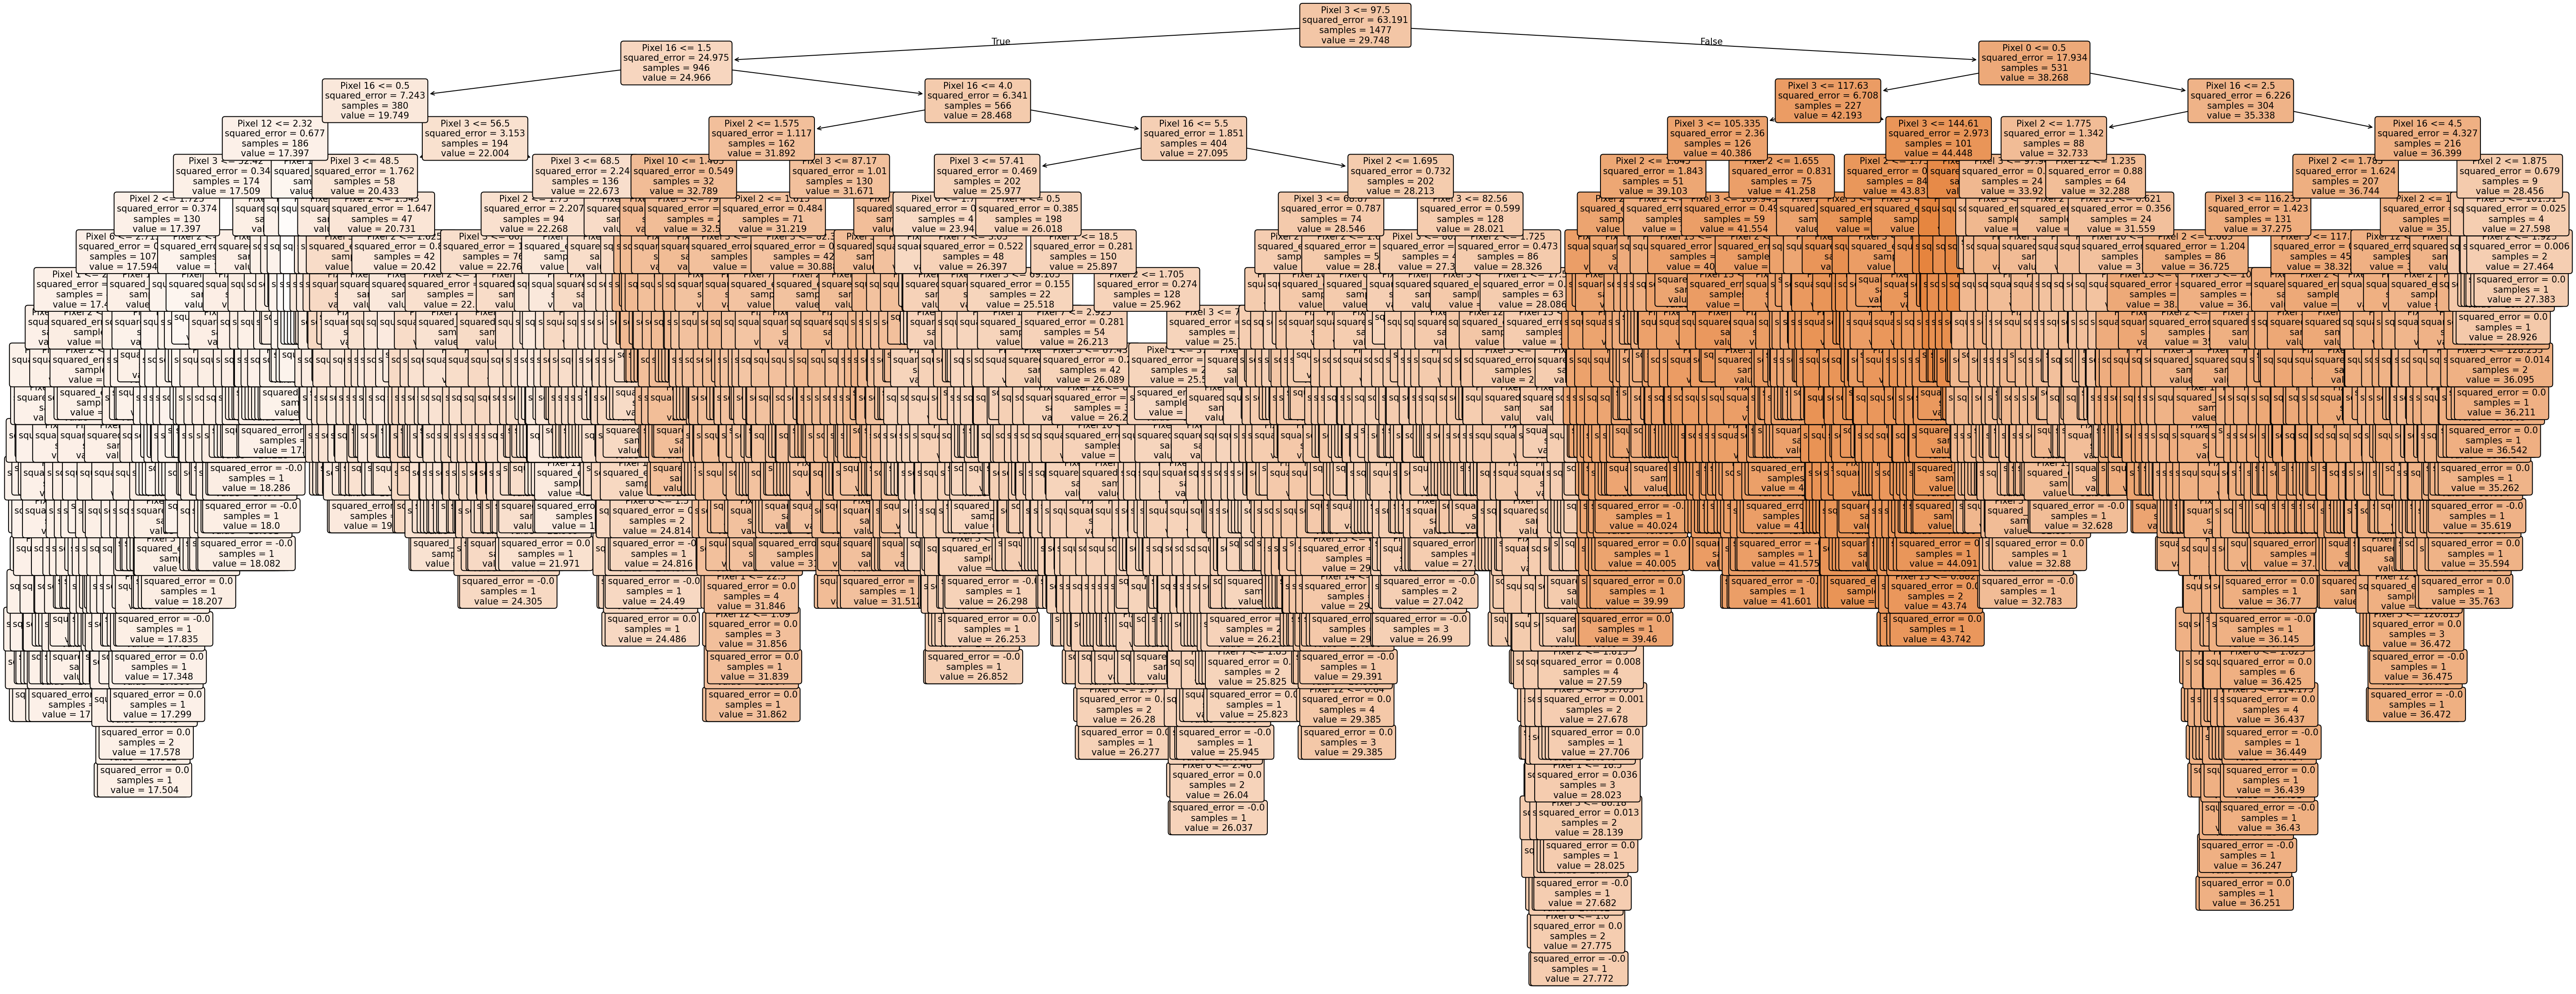

MAE (Error Absoluto Medio): 0.4278
MSE (Error Cuadrático Medio): 0.6415
RMSE (Raíz del Error Cuadrático Medio): 0.8009
R² (Coeficiente de Determinación): 0.9904


In [18]:
#ARBOL DE REGRESION
# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión para regresión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')


# Visualizar el árbol de decisión
plt.figure(figsize=(50, 20), dpi=150)  
tree.plot_tree(
    model, 
    filled=True, 
    feature_names=[f'Pixel {i}' for i in range(X.shape[1])], 
    class_names=[str(i) for i in range(10)],
    fontsize=10, 
    rounded=True, 
    proportion=False 
)
plt.show()

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")


In [19]:
#REGRESION LOGISTICA

#Modelos de clasificacion para predecir nivel de obesidad
#IMC > 18.5 = Bajo peso
#IMC 18.5 - 24.9 = Peso normal
#IMC 25-29-9 = Sobrepeso
#IMC >= 30 = Obesidad

#regresion logistica

from matplotlib import pyplot as plt
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

#Creamos columna estado peso
df["Estado_peso"]= df["IMC"].apply(lambda x: "Bajo peso" if x < 18.5 else "Peso normal" if x >= 18.5 and x < 24.9 else "Sobrepeso" if x >= 25 and x < 29.9 else "Obesidad")

#Categorizar la columna Estado_peso
labelencoder=LabelEncoder()
df["Estado_peso_co"]= labelencoder.fit_transform(df["Estado_peso"])
df




Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no   2.0   
1     Female   21    1.52   56.00                            yes   no   3.0   
2       Male   23    1.80   77.00                            yes   no   2.0   
3       Male   27    1.80   87.00                             no   no   3.0   
4       Male   22    1.78   89.80                             no   no   2.0   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes   3.0   
2107  Female   22    1.75  133.74                            yes  yes   3.0   
2108  Female   23    1.75  133.69                            yes  yes   3.0   
2109  Female   24    1.74  133.35                            yes  yes   3.0   
2110  Female   24    1.74  133.47                            yes  yes   3.0   

      NCP       CAEC SMOKE  ...  FAVC_co CAEC_co  SMOKE_co  SCC_co CALC_co  \
0     3.0  Sometimes    no  ...        0       2         0       0       3   
1     3.0  Sometimes   yes  ...        0       2         1       1       2   
2     3.0  Sometimes    no  ...        0       2         0       0       1   
3     3.0  Sometimes    no  ...        0       2         0       0       1   
4     1.0  Sometimes    no  ...        0       2         0       0       2   
...   ...        ...   ...  ...      ...     ...       ...     ...     ...   
2106  3.0  Sometimes    no  ...        1       2         0       0       2   
2107  3.0  Sometimes    no  ...        1       2         0       0       2   
2108  3.0  Sometimes    no  ...        1       2         0       0       2   
2109  3.0  Sometimes    no  ...        1       2         0       0       2   
2110  3.0  Sometimes    no  ...        1       2         0       0       2   

     NObeyesdad_co MTRANS_co        IMC  Estado_peso  Estado_peso_co  
0                1         3  24.386526  Peso normal               2  
1                1         3  24.238227  Peso normal               2  
2                1         3  23.765432  Peso normal               2  
3                5         4  26.851852    Sobrepeso               3  
4                6         3  28.342381    Sobrepeso               3  
...            ...       ...        ...          ...             ...  
2106             4         3  44.940324     Obesidad               1  
2107             4         3  43.670204     Obesidad               1  
2108             4         3  43.653878     Obesidad               1  
2109             4         3  44.044788     Obesidad               1  
2110             4         3  44.084423     Obesidad               1  

[2111 rows x 29 columns]

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       1.00      0.98      0.99       293
           2       0.96      0.93      0.94        96
           3       0.96      0.99      0.98       160

    accuracy                           0.98       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.98      0.98      0.98       634



c:\Users\ia\Desktop\EXAMEN_UNO_CAMARA\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


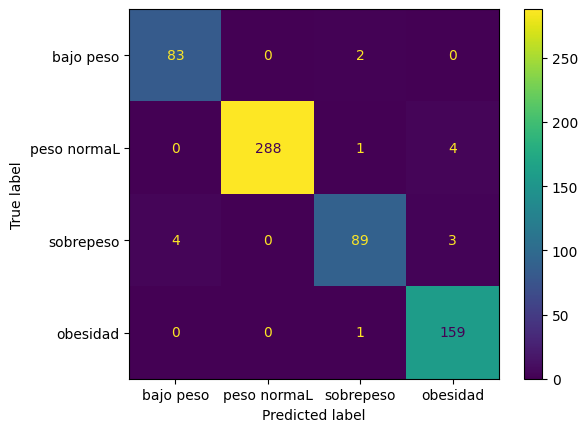

In [20]:
# Definir X (variables independientes)

X = df.drop(columns=["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "NObeyesdad","MTRANS", "Estado_peso","Estado_peso_co"], axis=1)

# Convertir y a una sola columna con valores categóricos 
y = df["Estado_peso_co"]


# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de regresión logística multinomial
model = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial')

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["bajo peso","peso normaL","sobrepeso","obesidad"])

plt.show()


In [21]:
# Creamos la función para ejecutar el modelo con nuevos datos 
nombre_caracteristica = ["Gender_co", "Age","Height","Weight","family_history_with_overweight_co","FAVC_co","FCVC","NCP","CAEC_co","SMOKE_co","CH2O","SCC_co","FAF","TUE","CALC_co","MTRANS_co","NObeyesdad_co", "IMC"  
]

    
# Función para predecir la clase de un animal
def predecir(caracteristicas):
    # Solita al usuario los datos del nuevo registro
    print("Introduce los datos del nuevo registro para predecir su clase:")
    valores = []
    for e in caracteristicas:
        r = float(input(f"Introduce {e}:"))
        valores.append(r)
    # Crear un DataFrame de pandas con los mismos nombres de columna
    X_new = pd.DataFrame([valores], columns=caracteristicas)

    # Realizar la predicción con el modelo
    y_new = model.predict(X_new)

    # Mostrar el resultado de la predicción
    if y_new == 0:
        print("bajo peso")
    elif y_new == 1:
        print("peso normal")
    elif y_new == 2:
        print("sobrepeso")
    else:
        print("obesidad")

predecir(nombre_caracteristica)




Introduce los datos del nuevo registro para predecir su clase:
peso normal


c:\Users\ia\Desktop\EXAMEN_UNO_CAMARA\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy en el conjunto de prueba: 0.9953


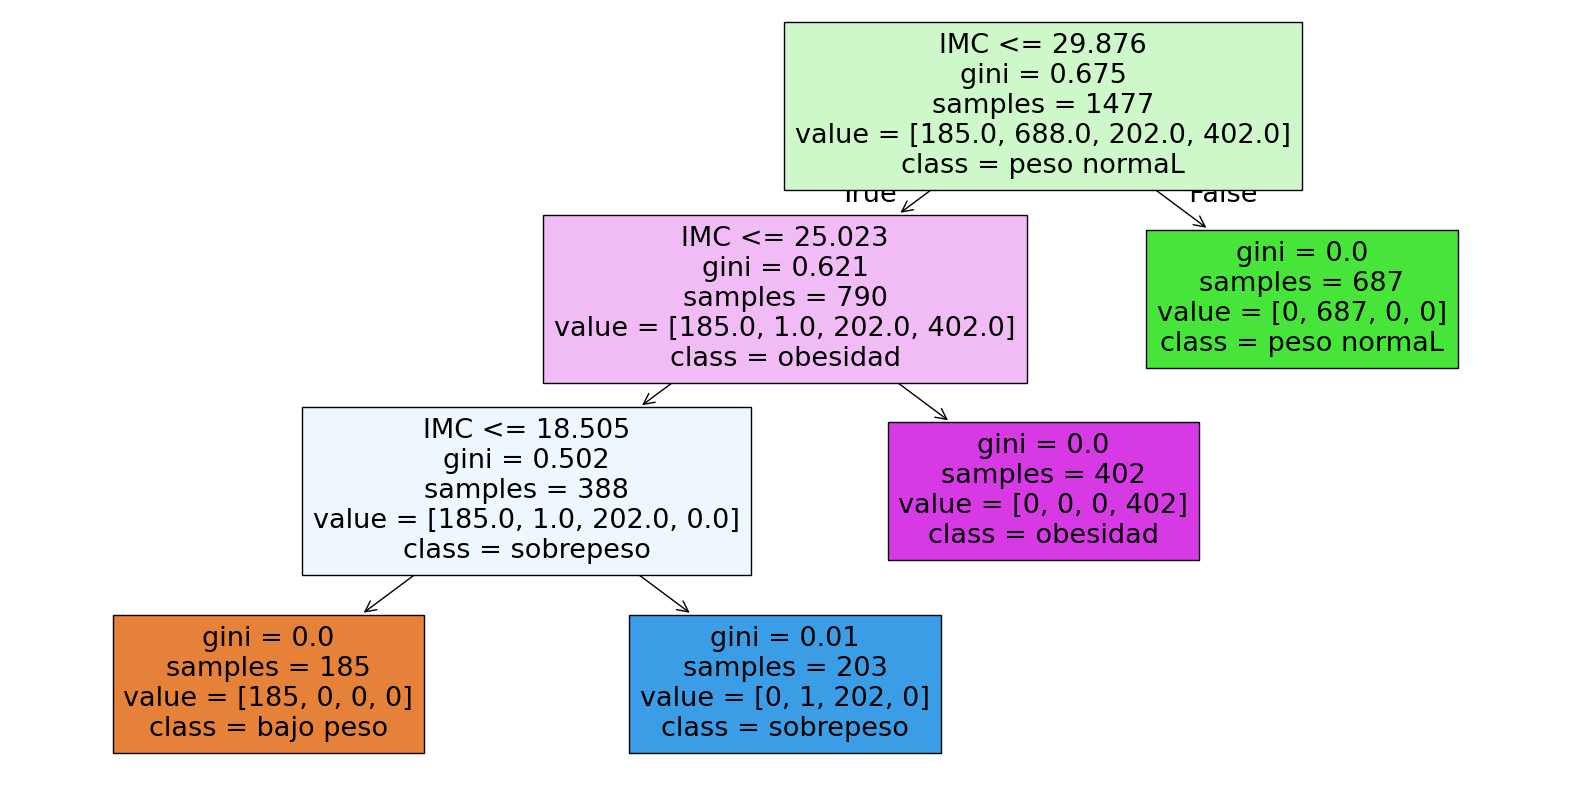

In [22]:
#ARBOL DE DECISION

from matplotlib import pyplot as plt
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best' , 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Hacer predicciones
y_pred = grid_search.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico si es necesario
tree.plot_tree(
    grid_search.best_estimator_,
    filled=True,
    feature_names=X.columns,   # Nombres de las características
    class_names=["bajo peso","peso normaL","sobrepeso","obesidad"]  # Convertir clases a string
)
plt.show()

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [23]:
df

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no   2.0   
1     Female   21    1.52   56.00                            yes   no   3.0   
2       Male   23    1.80   77.00                            yes   no   2.0   
3       Male   27    1.80   87.00                             no   no   3.0   
4       Male   22    1.78   89.80                             no   no   2.0   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes   3.0   
2107  Female   22    1.75  133.74                            yes  yes   3.0   
2108  Female   23    1.75  133.69                            yes  yes   3.0   
2109  Female   24    1.74  133.35                            yes  yes   3.0   
2110  Female   24    1.74  133.47                            yes  yes   3.0   

      NCP       CAEC SMOKE  ...  FAVC_co CAEC_co  SMOKE_co  SCC_co CALC_co  \
0     3.0  Sometimes    no  ...        0       2         0       0       3   
1     3.0  Sometimes   yes  ...        0       2         1       1       2   
2     3.0  Sometimes    no  ...        0       2         0       0       1   
3     3.0  Sometimes    no  ...        0       2         0       0       1   
4     1.0  Sometimes    no  ...        0       2         0       0       2   
...   ...        ...   ...  ...      ...     ...       ...     ...     ...   
2106  3.0  Sometimes    no  ...        1       2         0       0       2   
2107  3.0  Sometimes    no  ...        1       2         0       0       2   
2108  3.0  Sometimes    no  ...        1       2         0       0       2   
2109  3.0  Sometimes    no  ...        1       2         0       0       2   
2110  3.0  Sometimes    no  ...        1       2         0       0       2   

     NObeyesdad_co MTRANS_co        IMC  Estado_peso  Estado_peso_co  
0                1         3  24.386526  Peso normal               2  
1                1         3  24.238227  Peso normal               2  
2                1         3  23.765432  Peso normal               2  
3                5         4  26.851852    Sobrepeso               3  
4                6         3  28.342381    Sobrepeso               3  
...            ...       ...        ...          ...             ...  
2106             4         3  44.940324     Obesidad               1  
2107             4         3  43.670204     Obesidad               1  
2108             4         3  43.653878     Obesidad               1  
2109             4         3  44.044788     Obesidad               1  
2110             4         3  44.084423     Obesidad               1  

[2111 rows x 29 columns]

Podemos comprobar que la columna que mas impacta en a la prediccion del IMC es la columna Weight y también Height, lo cual es lógico ya que son las columnas que hemos usado para crearla. Respecto a los modelos, tanto la regresión múltiple como el árbol de regresión dan muy buenos resultados.

En cuanto a la variable Estado_peso, la columna que más impacta es IMC ya que la hemos usado para crear las tipos de esta. Tanto el árbol de clasificación como la regresión logística tienen una alta precisión.


Como hipótesis, diriamos que los factores en este dataset que más influencian la obesidad de una persona son la altura y el peso.